# Dimension Reduction with PCA

In this notebook, we will take a look at how PCA can be used to visualize high-dimensional data.

## MNIST Dataset

To use some realistic data, let's load the famous MNIST dataset, consisting of hand drawn digits $0,1,\ldots,9$. There is a built in `sklearn` function to load this dataset (it loads a small version of the full MNIST dataset, with a relatively small number of low-resolution images).

In [1]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.data.shape

(1797, 64)

This version of MNIST contains 1797 samples of handwritten digits, represented $8 \times 8$ images. We can think of these as vectors in $\mathbb{R}^{8 \times 8} \approx \mathbb{R}^{64}$.

Here are a few samples from the dataset.

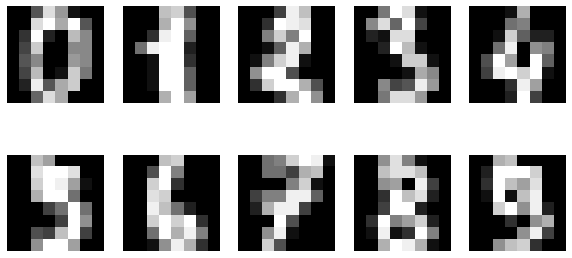

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,5))

for j in range(10):
    fig.add_subplot(2,5,j+1)
    plt.axis('off')
    plt.imshow(digits.images[j], cmap='gray')
    
plt.show()

We can get nicer-looking pictures by applying a filter to smooth the data (this is only for visualization purposes).

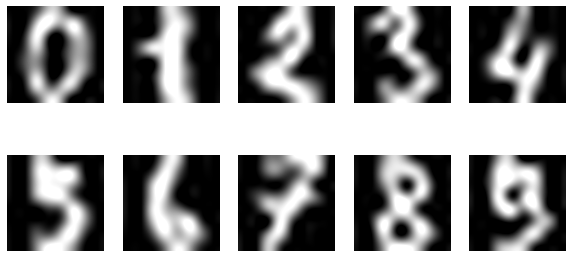

In [3]:
fig = plt.figure(figsize=(10,5))

for j in range(10):
    fig.add_subplot(2,5,j+1)
    plt.axis('off')
    plt.imshow(digits.images[j], cmap='gray', interpolation = 'lanczos')
    
plt.show()

## PCA on MNIST

Recall that our `digits.data` matrix has shape 1797 x 64 = samples x features. So this is a "data matrix" in the sense we just described in lecture. We can apply PCA to this data matrix -- remember this is just computing the singular vectors of the matrix! There is a built-in `sklearn` function to handle this.

In [6]:
from sklearn.decomposition import PCA

pca = PCA() # Initialize the model
pca.fit(digits.data) # fit the model to our data matrix

PCA()

The fitted PCA model has various attributes. The singularvectors we are interested are stored in the `components_` attribute.

In [7]:
print(pca.components_.shape)
print(pca.components_[:,1])

(64, 64)
[-1.73094651e-02 -1.01064569e-02  1.83420720e-02  2.00129102e-02
  1.40785917e-02 -9.63005661e-03 -2.48955281e-03  2.26464557e-02
 -1.69783375e-02  2.48761282e-02  2.47267672e-03 -6.94806380e-03
 -2.68117485e-02  5.27412999e-02 -9.64267716e-03 -5.83711442e-03
 -7.77679339e-03 -2.33355229e-02 -1.91988157e-02 -4.24501340e-03
  2.64059374e-02  8.70231738e-03  2.73063253e-02 -5.00368907e-02
 -2.04067438e-02  3.24840425e-03  8.24410330e-03  9.17016581e-03
  1.79906763e-03 -5.30873742e-02  7.32445879e-03 -8.21540513e-02
 -3.72753162e-02 -2.82250807e-02 -2.92369758e-02 -2.22305267e-02
 -2.57463297e-02  2.20292708e-02 -1.10277852e-02 -6.59218383e-02
 -2.23036286e-02  1.43477215e-01  4.47168068e-02 -5.40694752e-02
 -1.20937445e-01 -6.71643153e-02 -1.06708736e-02 -1.00061452e-01
  6.01671843e-01  7.22076025e-03 -1.72604464e-03 -7.42153872e-01
 -7.85828334e-03 -4.68044443e-03  1.66910220e-02 -1.65920098e-02
  1.60386679e-02 -3.76592840e-03 -4.68394034e-03 -1.29274497e-03
  5.98484717e-03

Specifically, `pca.components_` is a 64x64 matrix containing all singular vectors of our data matrix as its columns.

Remember, the motivation for PCA was to find a good low-dimensional subspace to project our data onto. Our theory says that the best possible $k$-dimensional subspace (in terms of distorting the data as little as possible) is the one spanned by the first $k$ singular vectors. 

Let's project onto the first 2 singular vectors. We'll do this 'by hand', so that we can see what's going on. There is built in `sklearn` functionality for this as well.

In [8]:
pVec0 = pca.components_[0]
pVec1 = pca.components_[1]

import numpy as np

projectedMNIST = []

# Now we linearly project every sample in our dataset onto the two-dimensional subspace spanned by the first 
# two singular vectors
for j in range(1797):
    projectedMNIST.append([np.dot(digits.data[j],pVec0),np.dot(digits.data[j],pVec1)])

projectedMNIST = np.array(projectedMNIST)

Since we projected onto a two-dimensional plane, we can now visualize our data!

The figure below shows our 64-dimensional data, projected onto our 2-dimensional PCA subspace. The dots are colored by their 'class' (i.e., which digit is drawn, 0,1,...,9).

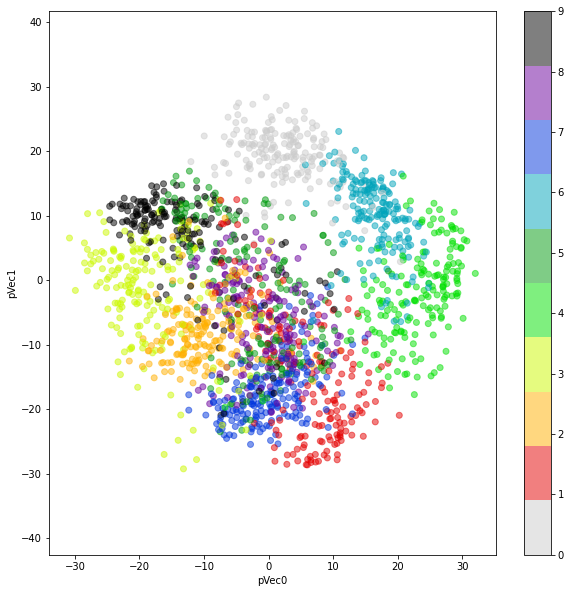

In [9]:
plt.figure(figsize=(10,10))

plt.scatter(projectedMNIST[:, 0], projectedMNIST[:, 1],
            c=digits.target, alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral_r', 10))

plt.xlabel('pVec0')
plt.ylabel('pVec1')
plt.axis('equal')
plt.colorbar();

We see that our data is separated out in some sensible way according to class!

As a **baseline**, here's what we get if we project onto a random 2-dimensional subspace of our 64-dimensional data space.

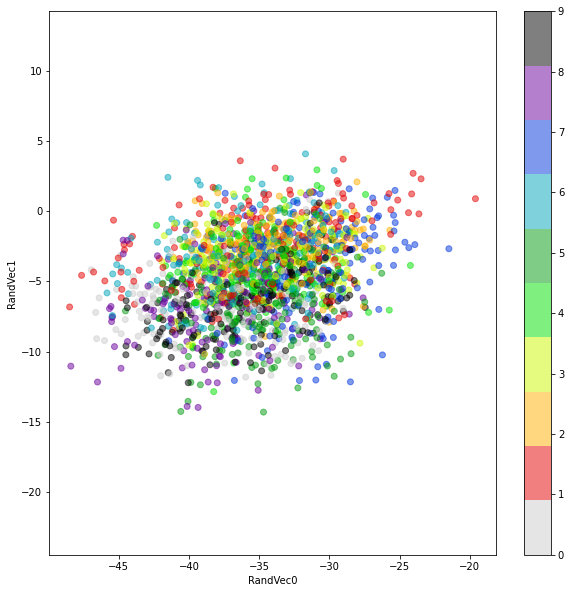

In [10]:
from scipy.linalg import orth

RandVecs = orth(np.random.rand(64,2))

RandVec0 = RandVecs[:,0]
RandVec1 = RandVecs[:,1]

import numpy as np

RandProjectedMNIST = []

for j in range(1797):
    RandProjectedMNIST.append([np.dot(digits.data[j],RandVec0),np.dot(digits.data[j],RandVec1)])

RandProjectedMNIST = np.array(RandProjectedMNIST)

plt.figure(figsize=(10,10))

plt.scatter(RandProjectedMNIST[:, 0], RandProjectedMNIST[:, 1],
            c=digits.target, alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral_r', 10))

plt.xlabel('RandVec0')
plt.ylabel('RandVec1')
plt.axis('equal')
plt.colorbar();

So we see that PCA is really doing some work for us!

In this image application, we can also visualize our principal vectors--we just need to reshape the 64-dimensional vectors into 8x8 images.

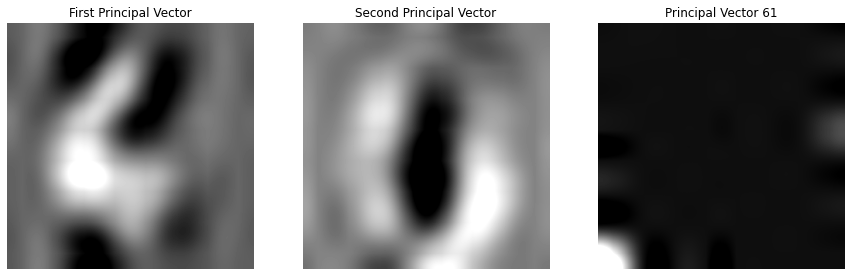

In [17]:
plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
plt.imshow(pVec0.reshape(8,8),cmap='gray', interpolation = 'sinc')
plt.axis('off')
plt.title('First Principal Vector')

plt.subplot(1,3,2)
plt.imshow(pVec1.reshape(8,8),cmap='gray', interpolation = 'sinc')
plt.axis('off')
plt.title('Second Principal Vector')

k = 60
plt.subplot(1,3,3)
plt.imshow(pca.components_[k].reshape(8,8),cmap='gray', interpolation = 'sinc')
plt.axis('off')
plt.title('Principal Vector '+str(k+1))

plt.show()

Eyeballing (so we are perhaps subject to confirmation bias...), we see that hte first principal vector seems sensitive to picking out shapes that look like '4', while the second is sensitive to shapes that look like '0'. This is confirmed by the scatter plot. 

Moreover, looking at the negative PC1 direction, it seems that '3' is the "least '4'-like" digit. The PC2 direction shows that '1' is the "least '0'-like" digit. 

As we increas $k$, the $k$th principal vector becomes less and less interpretable to human eyes.

Typically, the first few principal vectors capture the majority of the variability in the data.

The statement above can be quantified using the *explained variance ratio*, which is the function
\begin{align*}
\mathrm{EVR}:\{1,\ldots,m\} &\to \mathbb{R} \\
k &\mapsto \frac{1}{T} \sum_{i=1}^k \sigma_i^2,
\end{align*}
where $\sigma_i$ is the $i$-th singular value of the data matrix, $m$ is the number of samples, and $T$ is the total sum of squared singular values (to normalize).

For our data, this looks like:

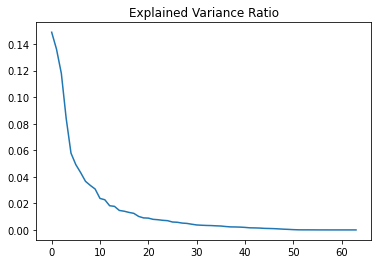

In [18]:
plt.plot(pca.explained_variance_ratio_)
plt.title('Explained Variance Ratio')
plt.show()

This shows that the first few principal vectors are really doing the heavy lifting in representing the data.

It is also informative to look at the 'running total' of explained variance, which shows how much total variance is explained as a percentage by the first $k$ principal vectors.

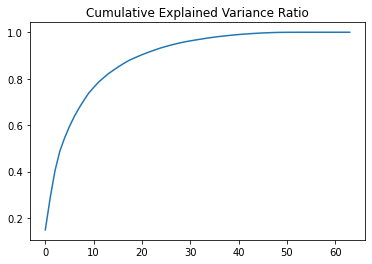

In [19]:
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.title('Cumulative Explained Variance Ratio')
plt.show()

This means that 80% of the variation in the data is captured by ~10 principal vectors.

## Other Dimension Reduction Techniques

The process of taking data that lives in a high-dimensional space and trying to 'faithfully' represent it in a low-dimensional space is called *dimension reduction*. PCA is the most basic and arguably most easily interpretable dimension reduction algorithm. It is simple because it is all based on orthogonal projection, which is inherently a *linear* operation.

On the other hand, there are many other dimension reduction techniques and most of the popular ones are *non-linear*. I.e., they are *not* realized by a linear function $\Phi:\mathbb{R}^N \to \mathbb{R}^n$ (where $N$ is a large number and $n=2$ or $3$, typically). 

One such example is called *t-SNE*. We apply this algorithm to MNIST below without explaining how it works.

In [22]:
# Let's time the computation
import time 

from sklearn.manifold import TSNE

start = time.time()
digits_projected = TSNE(n_components=2).fit_transform(digits.data)
end = time.time()

print(f'Compute time {np.round(end-start,3)} seconds')

Compute time 4.568 seconds


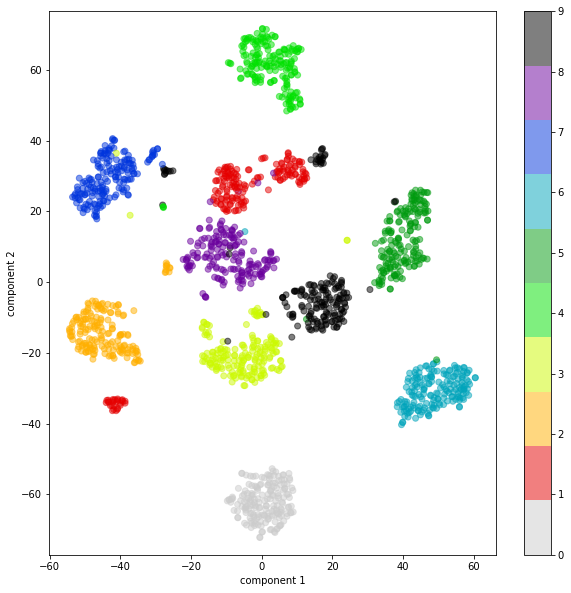

In [23]:
plt.figure(figsize = (10,10))

plt.scatter(digits_projected[:, 0], digits_projected[:, 1],
            c=digits.target, alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral_r', 10))

plt.xlabel('component 1')
plt.ylabel('component 2')
plt.axis('equal')
plt.colorbar();

From this example, we see that the nonlinear dimension reduction performed by t-SNE does *extremely well* at separating the data from different classes.

The computation of t-SNE is an optimization problem, which is solved by gradient descent. To make sense of these terms, we need to study *Vector Calculus*, which forms the second part of the course!